In [1]:
import matplotlib.pyplot as plt
import control as co
import numpy as np
import sympy as sp

# Chapter 1

## Example 1.1

In [2]:
# Greek alphabet
from sympy.abc import theta
# English alphabet
from sympy.abc import a, s, t, T

In [3]:
prod = sp.collect(sp.expand((s + 1)*(s + a)), s)
prod

a + s**2 + s*(a + 1)

In [4]:
Go_1 = co.tf([1], [1, 1 - 0.01, -0.01])

Go_2 = co.tf([1], [1, 1, 0])

Go_3 = co.tf([1], [1, 1 + 0.01, 0.01])

In [5]:
systems = [Go_1, Go_2, Go_3]
# time_ol = np.linspace(0, 300, 700) # Full response showing the divergence
time_ol = np.linspace(0, 50, 700) # Zoomed in to show that the initial portions of the responses are similar

### Open loop response

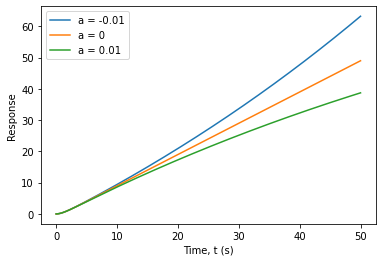

In [6]:
for sys in systems:
    T, y = co.step_response(sys, T=time_ol)
    plt.plot(T, y)
plt.xlabel('Time, t (s)')
plt.ylabel('Response')
plt.legend(['a = -0.01', 'a = 0', 'a = 0.01'])
plt.show()

### Closed Loop Response

In [7]:
# time_cl = np.linspace(0, 300, 700) # Full response showing the divergence
time_cl = np.linspace(0, 13, 50) # Zoomed in to show that the initial portions of the responses are similar

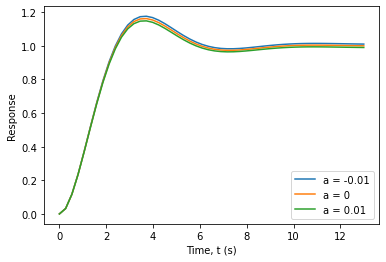

In [8]:
systems_cl = []
for sys in systems:
    sys_closed_loop = co.feedback(sys, 1)
    T, y = co.step_response(sys_closed_loop, T=time_cl)
    plt.plot(T, y)
    systems_cl.append(sys_closed_loop)
plt.xlabel('Time, t (s)')
plt.ylabel('Response')
plt.legend(['a = -0.01', 'a = 0', 'a = 0.01'])
plt.show()

### Bode Plots 

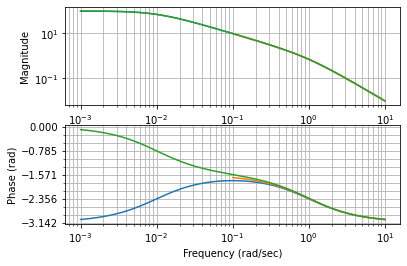

In [9]:
for sys in systems:
    co.bode_plot(sys, dB=False, deg=False)

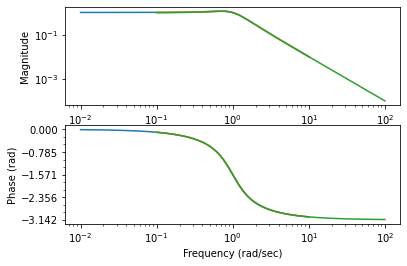

In [10]:
for sys in systems_cl:
    co.bode(sys, dB=False, deg=False, grid=False)

## Example 1.2

In [11]:
# Greek alphabet
from sympy.abc import theta
# English alphabet
from sympy.abc import a, s, T

In [12]:
num = sp.collect(sp.expand(400*(1 - s*T)), s)
num

-400*T*s + 400

In [13]:
denum = sp.collect(sp.expand((s + 1)*(s + 20)*(1 + T*s)), s)
denum


T*s**3 + s**2*(21*T + 1) + s*(20*T + 21) + 20

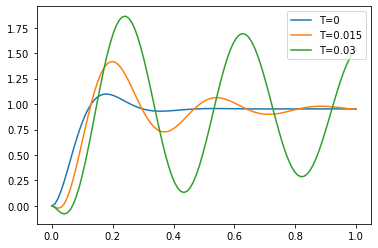

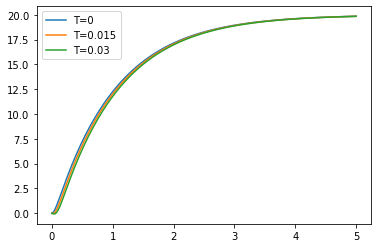

In [14]:
# systems = [co.tf(Go_1), co.tf(Go_2), co.tf(Go_3)]
systems_ol = []
systems_cl = []
T_vals = [0, 0.015, 0.03]
time_ol = np.linspace(0, 5, 200)
time_cl = np.linspace(0, 1, 100)
for Tv in T_vals:
    
    if Tv != 0:
        num_lop = sp.Poly(num.subs(T, Tv)).all_coeffs()
    else:
        num_lop = [400]
    den_lop = sp.Poly(denum.subs(T, Tv)).all_coeffs()
    sys_lop = co.tf([float(n) for n in num_lop], [float(d) for d in den_lop])
    
    # Open Loop
    systems_ol.append(sys_lop)
    T_lop, y = co.step_response(sys_lop, time_ol)
    plt.figure(1)
    plt.plot(T_lop, y)
    
    # Closed Loop
    sys_lop = co.feedback(sys_lop, 1)
    systems_cl.append(sys_lop)
    T_lop, y = co.step_response(sys_lop, time_cl)
    plt.figure(2)
    plt.plot(T_lop, y)
plt.legend(['T=0', 'T=0.015', 'T=0.03'])
plt.figure(1)
plt.legend(['T=0', 'T=0.015', 'T=0.03'])
plt.show()

### Bode Plots

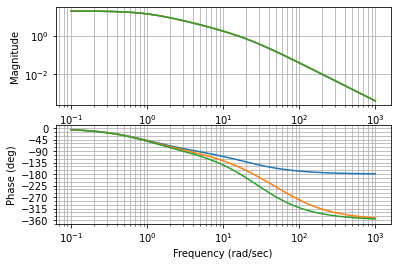

In [15]:
for sys in systems_ol:
    co.bode_plot(sys, dB=False, deg=True)

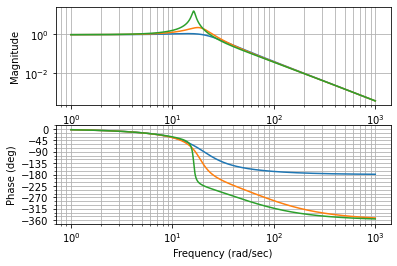

In [16]:
for sys in systems_cl:
    co.bode_plot(sys, dB=False, deg=True)

## Example 1.4

In [17]:
# Greek alphabet
from sympy.abc import theta
# English alphabet
from sympy.abc import a, s, t, K, T

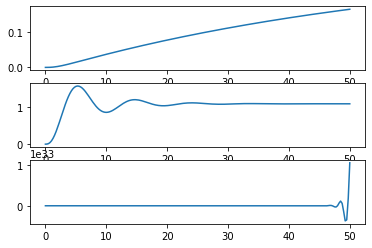

In [18]:
u_vals = [0.3, 1.1, 5.1]
time = np.linspace(0, 50, 200)
for idx, uv in enumerate(u_vals):
    plt.subplot(3, 1, (idx + 1))
    sys1 = co.tf([(0.6*uv**3), (0.6*uv**3)], [1, 0])
    sys2 = co.tf([1], [1, 3, 3, 1])
    sys = co.feedback(co.series(sys1, sys2))
    T_lop, y = co.step_response(sys, T=time)
    plt.plot(T_lop, y*uv)
# plt.legend(['0.3', '1.1', '5.1'])
plt.show()

# Chapter 2

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numpy import transpose as trans
from numpy.random import normal
from numpy.linalg import inv

## Example 2.12

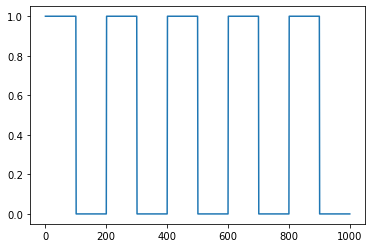

In [30]:
a_true, b_true, std_dev = -0.8, 0.5, 0.5
N = 1000
time = np.arange(N + 1)

# Kronecker delta input
delta = np.zeros(time.shape)
delta[np.where(time == 50)] = 1

# Create square 
square = np.ones((101,))
for i in np.arange(0, 9):
    if (i % 2) == 0:
        square = np.concatenate((square, np.zeros(100,)))
    else: 
        square = np.concatenate((square, np.ones(100,)))

# Input and output definition
u = delta
# u = square
y = np.zeros(time.shape)
y[0] = normal(scale=std_dev)

# Initial 
# theta_naught = np.array([[0], [0]])
theta_naught = np.zeros((2,1))
P_naught = 100 * np.eye(2)

plt.plot(square)

In [31]:
def rls(theta_m1, P_m1, a=a_true, b=b_true, sig=std_dev):
    global idx, N, y, u, a_hat, b_hat
    
    y[idx] = -a*y[idx - 1] + b*u[idx - 1] + normal(scale=sig)
    
    phi = np.array([[-y[idx - 1]],
                   [u[idx - 1]]]).reshape(2,-1)  
    
    K = P_m1 @ phi @ inv(np.eye(1) + trans(phi) @ P_m1 @ phi) 
    P = (np.eye(2) - K @ trans(phi)) @ P_m1
    theta = theta_m1 + K @ (y[idx] - trans(phi) @ theta_m1)
    
    a_hat.append(float(theta[0]))
    b_hat.append(float(theta[1]))
    idx += 1
    if idx == N + 1:
        return theta, P
    else:
        return rls(theta, P)

### Parameter Estimation with Kronecker Delta Input

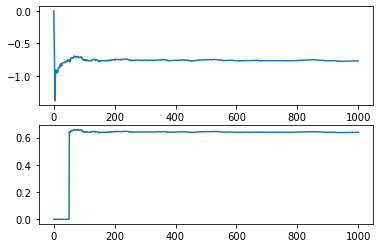

In [32]:
idx = 1
u = delta
a_hat, b_hat = [0], [0]
t, P = rls(theta_naught, P_naught)

plt.subplot(2, 1, 1)
plt.plot(time, a_hat)

plt.subplot(2, 1, 2)
plt.plot(time, b_hat)

plt.show()

### Parameter Estimation with Square Pulse 

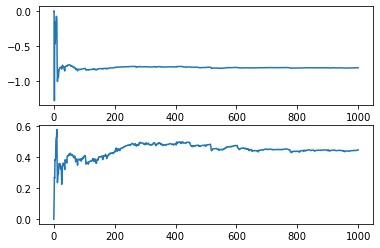

The final value of a is, [-0.81365595] and the final value of b is, [0.44497489]


In [23]:
idx = 1
u = square
a_hat, b_hat = [0], [0]
t, P = rls(theta_naught, P_naught)

plt.subplot(2, 1, 1)
plt.plot(time, a_hat)

plt.subplot(2, 1, 2)
plt.plot(time, b_hat)

plt.show()

print(f'The final value of a is, {t[0]} and the final value of b is, {t[1]}')